In [1]:
import numpy as np

from xml.dom import minidom
from scipy import ndimage
from matplotlib.path import Path
from matplotlib import pyplot as plt
from matplotlib import image

Based on [this Stackoverflow question](https://stackoverflow.com/questions/21566610/crop-out-partial-image-using-numpy-or-scipy)

In [3]:
#prototype with the first cell: 
masks = {'270-01-01':np.array([[112.00, 170.00], [112.00, 230.00], [129.27, 231.50], [132.00, 230.00], [232.00, 230.00], [240.00, 238.00], [299.69, 148.25],  [192.00, 157.00]])}
img = image.imread('../images/270.jpg')

In [18]:
xc = masks['270-01-01'][:,0]
yc = masks['270-01-01'][:,1]
              
nr, nc = img.shape
ygrid, xgrid = np.mgrid[:nr, :nc]
xypix = np.vstack((xgrid.ravel(), ygrid.ravel())).T

mask = pth.contains_points(xypix)

mask = mask.reshape(img.shape)

masked = np.ma.masked_array(img, ~mask)


xmin, xmax = int(xc.min()), int(np.ceil(xc.max()))
ymin, ymax = int(yc.min()), int(np.ceil(yc.max()))
trimmed = masked[ymin:ymax, xmin:xmax]


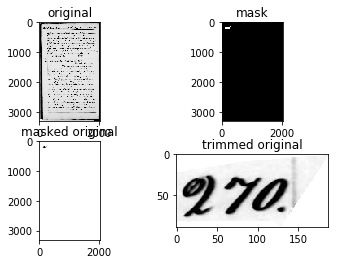

In [19]:
fig, ax = plt.subplots(2, 2)

ax[0,0].imshow(img, cmap=plt.cm.gray)
ax[0,0].set_title('original')
ax[0,1].imshow(mask, cmap=plt.cm.gray)
ax[0,1].set_title('mask')
ax[1,0].imshow(masked, cmap=plt.cm.gray)
ax[1,0].set_title('masked original')
ax[1,1].imshow(trimmed, cmap=plt.cm.gray)
ax[1,1].set_title('trimmed original')

plt.show()